# RBF interpolation examples

In [93]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


In [149]:
plt.rcParams['figure.figsize'] = (8., 6.)
plt.rcParams['font.size'] = 16.

## Layer stack

In [150]:
# define layer stack as functions:
def l1(x):
    return 3*x+10


In [164]:
l1 = lambda x : 0.25*x + 10
l2 = lambda x : 0.25*x + 20
l3 = lambda x : 0.25*x + 30

(-4.95, 103.95, 7.762499999999999, 56.9875)

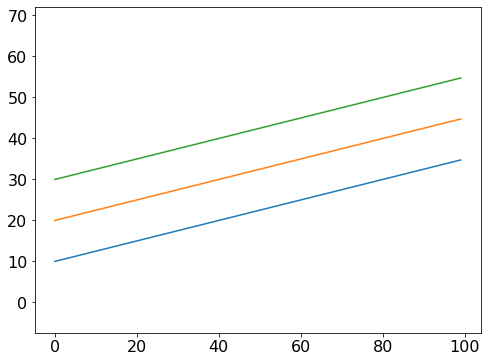

In [165]:
xvals = np.arange(100)
plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))
plt.axis('equal')

### Randomly sample points

(19.13463048058082, 93.92233286742493, 20.644411258570354, 43.67769018645503)

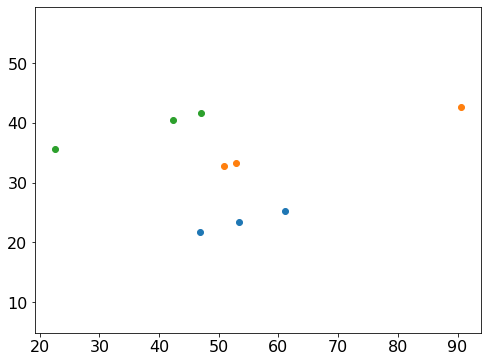

In [175]:
n_pts = 3 # Points per layer
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,100,n_pts)
l3_pts_y = l3(l3_pts_x)


# plt.plot(xvals, l1(xvals))
# plt.plot(xvals, l2(xvals))
# plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')


### RBF interpolation

In [176]:
# set up grid
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

# combine data in arrays
x = np.hstack([l1_pts_x, l2_pts_x, l3_pts_x])
y = np.hstack([l1_pts_y, l2_pts_y, l3_pts_y])

# give points values
z = np.hstack([np.ones(n_pts)*10, np.ones(n_pts)*20, np.ones(n_pts)*30])

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

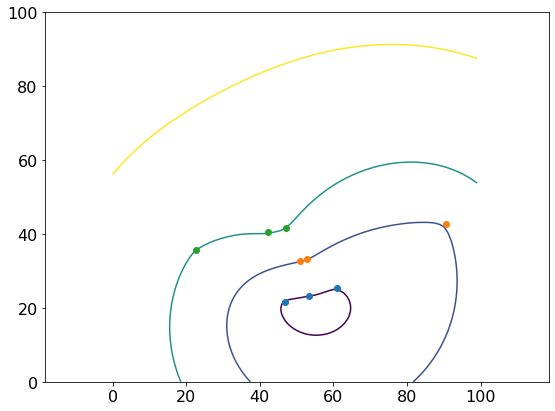

In [177]:
plt.contour(ZI, [10,20,30,50])
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')
plt.xlim([0,100])
plt.ylim([0,100])
plt.tight_layout()

### Testing different types of interp



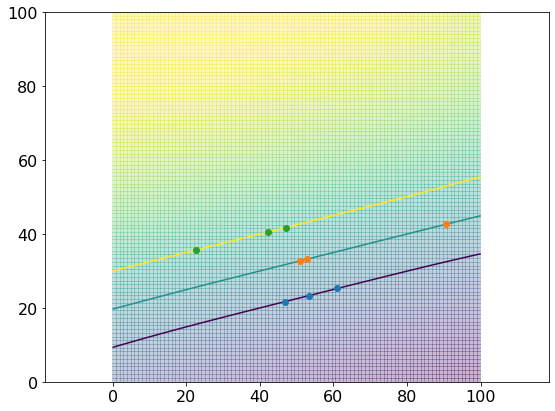

In [189]:
# use RBF
rbf = Rbf(x, y, z, function="gaussian", smooth=0., epsilon=100)
ZI = rbf(XI, YI)
plt.pcolor(XI, YI, ZI, alpha=0.3)
plt.contour(XI, YI, ZI, [10,20,30])
# plt.colorbar()
# plt.plot(xvals, l1(xvals))
# plt.plot(xvals, l2(xvals))
# plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')
plt.xlim([0,100])
plt.ylim([0,100])
plt.tight_layout()

In [184]:
Rbf?

### Extract only contours of interpolated lines


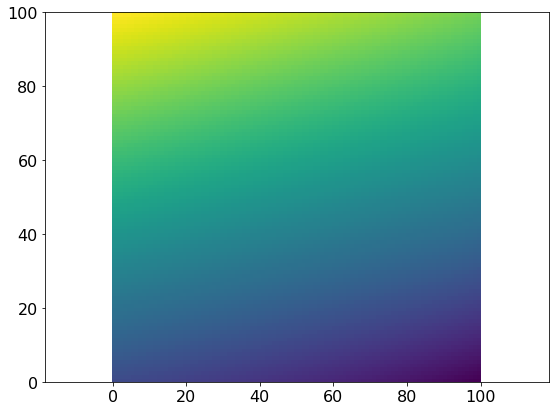

In [159]:
plt.pcolor(XI, YI, ZI)
# plt.contour(XI, YI, ZI, 20, alpha=0.6, colors='k')
plt.axis('equal')
plt.xlim([0,100])
plt.ylim([0,100])
plt.tight_layout()

### Add a new layer (inbetween and outside)

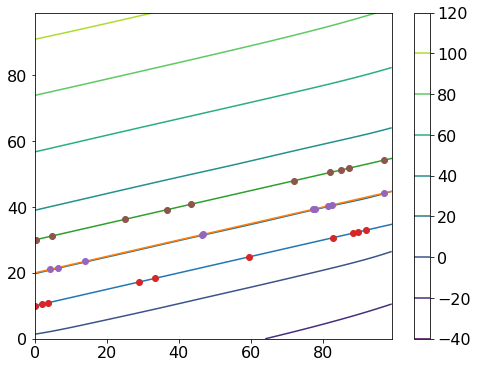

In [158]:
# new point, between existing lines
l4_v = 25
l4_x = 60
l4_y = 0.25*60+l4_v

# combine data in arrays
x_int = np.hstack([x, l4_x])
y_int = np.hstack([y, l4_y])

# give points values
z_int = np.hstack([z, l4_v])

rbf = Rbf(x, y, z, function="thin_plate")
ZI = rbf(XI, YI)
plt.contour(ZI)
plt.colorbar()
plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

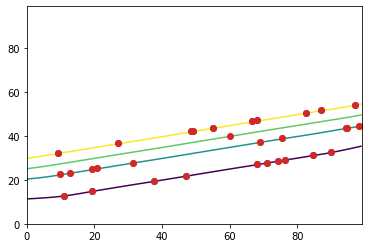

In [51]:
layer_vals = [10,20,25,30]
plt.contour(ZI, levels=layer_vals)
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')
plt.plot(x_int, y_int, 'o')

### Point outside


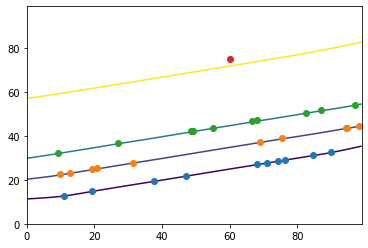

In [64]:
# new point, between existing lines
l5_v = 60
l5_x = 60
l5_y = 0.25*60+l5_v

# combine data in arrays
x_out = np.hstack([x, l5_x])
y_out = np.hstack([y, l5_y])

# give points values
z_out = np.hstack([z, l5_v])

rbf = Rbf(x, y, z, function="thin_plate")
ZI = rbf(XI, YI)

layer_vals = [10,20,30,l5_v]
plt.contour(ZI, levels=layer_vals)
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')
plt.plot(l5_x, l5_y, 'o')

## More complex layers

In [190]:
l1 = lambda x : 10*np.sin(0.1*x) + 10
l2 = lambda x : 10*np.sin(0.1*x) + 20
l3 = lambda x : 10*np.sin(0.1*x) + 30

(-5.0, 105.0, -1.999971452300779, 41.99999549246729)

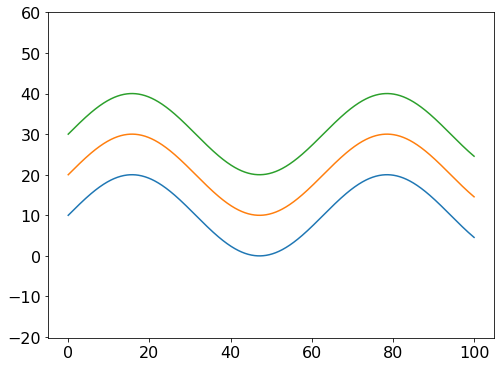

In [191]:
xvals = np.linspace(0,100,1000)
plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))
plt.axis('equal')

### Sample points


(-5.0, 105.0, -1.999971452300779, 41.99999549246729)

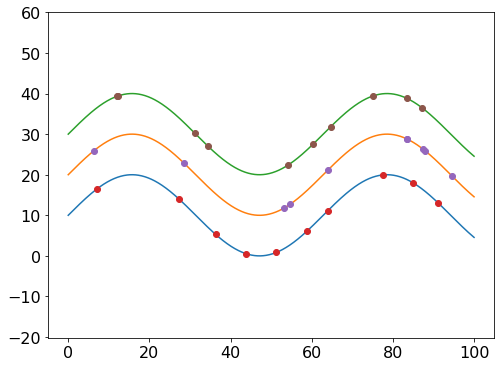

In [192]:
n_pts = 10 # Points per layer
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,100,n_pts)
l3_pts_y = l3(l3_pts_x)


plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')

### Interpolate

In [193]:
# set up grid
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

# combine data in arrays
x = np.hstack([l1_pts_x, l2_pts_x, l3_pts_x])
y = np.hstack([l1_pts_y, l2_pts_y, l3_pts_y])

# give points values
z = np.hstack([np.ones(n_pts)*10, np.ones(n_pts)*20, np.ones(n_pts)*30])



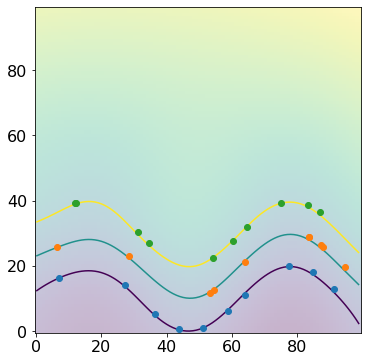

In [197]:
# use RBF
rbf = Rbf(x, y, z, epsilon=20)
ZI = rbf(XI, YI)
layer_vals = [10,20,30]
plt.contour(ZI, levels=layer_vals)
plt.imshow(ZI, alpha=0.3, origin='lower left')
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')



# Overturned fold